In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np

import mle as mle

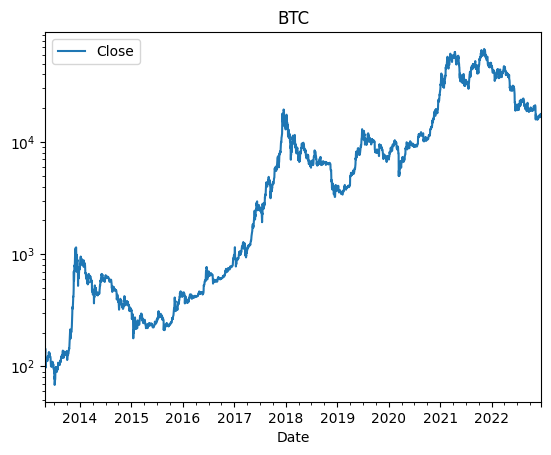

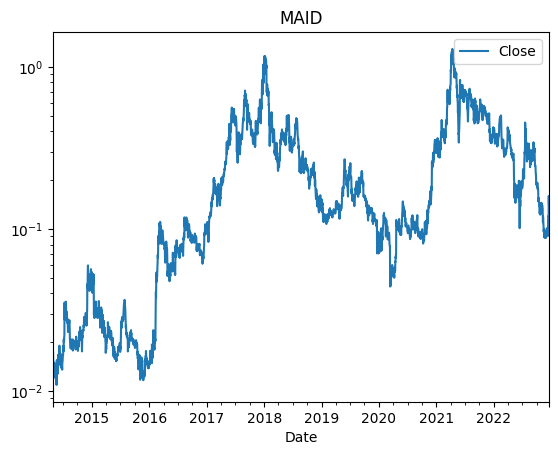

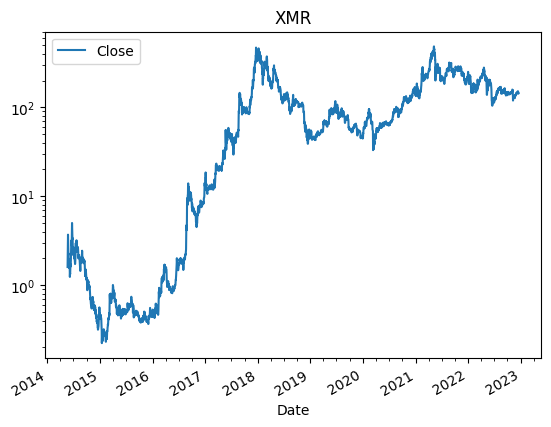

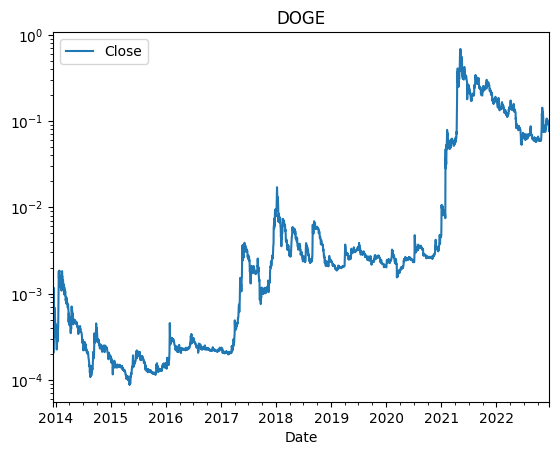

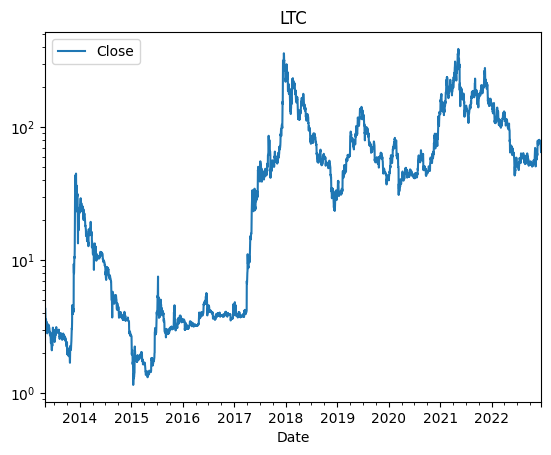

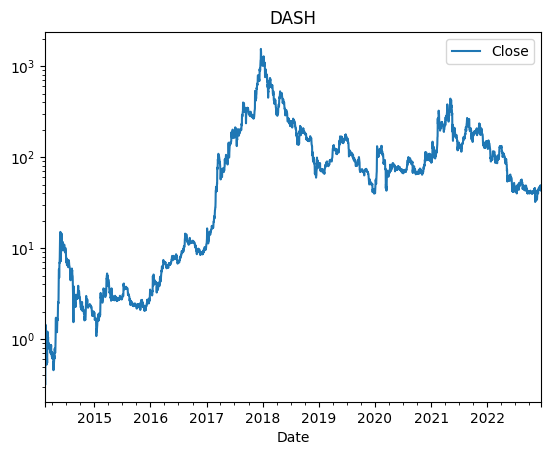

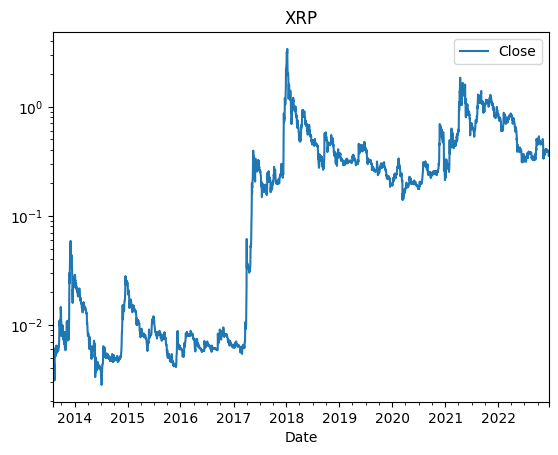

In [2]:
coins = ['BTC', 'MAID', 'XMR', 'DOGE', 'LTC', 'DASH', 'XRP']
dfs = dict()
for coin in coins:
    df = pd.read_csv(f'../data/prices/{coin}.csv').set_index('Date').sort_index()
    df.index = pd.to_datetime(df.index)
    df['log_return'] = np.log(1 + df['Close'].pct_change())
    dfs[coin.lower()] = df

    ax = df[['Close']].plot(logy=True)
    months = mdates.MonthLocator((1,4,7,10))
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.tick_bottom()

    plt.title(coin)
    plt.show()


In [3]:
dists = [mle.Laplace, mle.SkewT, mle.SkewedStudent, mle.GeneralizedT,
 mle.NormalizedInverseGaussian, mle.GeneralizedHyperbolic, mle.StudentT]
 
end_date = pd.to_datetime('28-02-2017', format='%d-%m-%Y')
start_date =  pd.to_datetime('23-06-2014', format='%d-%m-%Y')

info_list = []

for coin in coins:
    coin_df = dfs[coin.lower()]
    df = coin_df[(coin_df.index>=start_date)&(coin_df.index<=end_date)]

    for dist in dists:

        fitted_dist = dist()
        fitted_dist.mle(df['log_return'])
        aic = fitted_dist.aic()
        ll = fitted_dist.sol.fun
        info_list.append({'coin':coin, 'dist':fitted_dist.name, 'AIC':aic, 'LL':ll, 'pydist':fitted_dist})

c:\Users\George\projects\masters\stats_methods_cw\george\mle.py:62: RuntimeWarning: divide by zero encountered in log
  return -n*np.log(2*b)-np.sum(np.abs(x-mu)/b)
c:\Users\George\projects\masters\stats_methods_cw\george\mle.py:62: RuntimeWarning: invalid value encountered in double_scalars
  return -n*np.log(2*b)-np.sum(np.abs(x-mu)/b)
c:\Users\George\projects\masters\stats_methods_cw\venv\lib\site-packages\scipy\stats\_continuous_distns.py:6703: RuntimeWarning: overflow encountered in power
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))
c:\Users\George\projects\masters\stats_methods_cw\george\mle.py:136: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.skewt_pdf(x,mu,sigma,nu,lmda)))
c:\Users\George\projects\masters\stats_methods_cw\george\mle.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (2/sigma)*stats.t.pdf(x-mu/sigma,df=nu)*\
c:\Users\George\projects\masters\stats_methods_cw\george\mle.py:116: RuntimeWarning: invali

In [4]:
out = pd.DataFrame(data =info_list)
out.pivot(index='coin', columns='dist', values=['LL']).T.swaplevel().sort_index()


,coin,BTC,DASH,DOGE,LTC,MAID,XMR,XRP
dist,,,,,,,,
Generalized Hyperbolic,LL,-2120.963709,-1551.381335,-1792.835678,-2030.936243,-1321.022687,-1304.283758,-1816.885336
Generalized T,LL,-2234.276153,-1547.864134,-1789.733843,-2025.120717,-1320.679055,-1303.011114,-1902.475097
Laplace,LL,-1965.527170,-1196.160219,-1763.358933,-1936.768444,-1315.874396,-1299.441505,-1875.665707
Normalized Inverse Gaussian,LL,-2231.539179,-1551.303091,-1792.811527,-2027.778737,-1320.809726,-1303.930437,-1905.596188
Skew T,LL,-2235.784670,-5683.926695,-2021.163709,-3694.402026,437.916831,-5736.913319,865.358543
Skewed Student T,LL,-2223.143401,-1547.985032,-1787.610444,165.429763,-1320.194307,-1300.195711,-1897.820452
Student T,LL,-2222.967147,-1544.720422,-1786.578898,-2017.760085,-1319.576906,-1299.326500,-1895.752184


In [9]:
out[out['coin']=='XMR'].loc[15]['pydist'].sol
# return (self.kappa(nu)/(sigma) * (1+ ((x-mu)**2)/(nu * sigma**2))**(-(1+nu)/2)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -5736.913318560428
       x: [ 1.553e-04  1.134e-03  2.870e+01 -4.483e-03]
     nit: 80
     jac: [ 1.213e+05  8.489e+05 -3.158e-01  3.377e+01]
    nfev: 513
    njev: 76

In [6]:
out[out['coin']=='BTC'].loc[5]['pydist'].sol

 message: Singular matrix E in LSQ subproblem
 success: False
  status: 5
     fun: -2120.963709373556
       x: [ 1.648e-04  1.000e-02 -3.679e-01  2.842e+00  2.842e+00]
     nit: 6
     jac: [-6.254e+02  1.060e+04  7.995e+02 -4.550e+06        nan]
    nfev: 51
    njev: 6